In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway  # ANOVA


In [6]:
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierra-leone_clean.csv")

# Add a 'Country' column to each
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierra["Country"] = "Sierra Leone"

# Combine into one DataFrame
df_all = pd.concat([benin, togo, sierra], ignore_index=True)


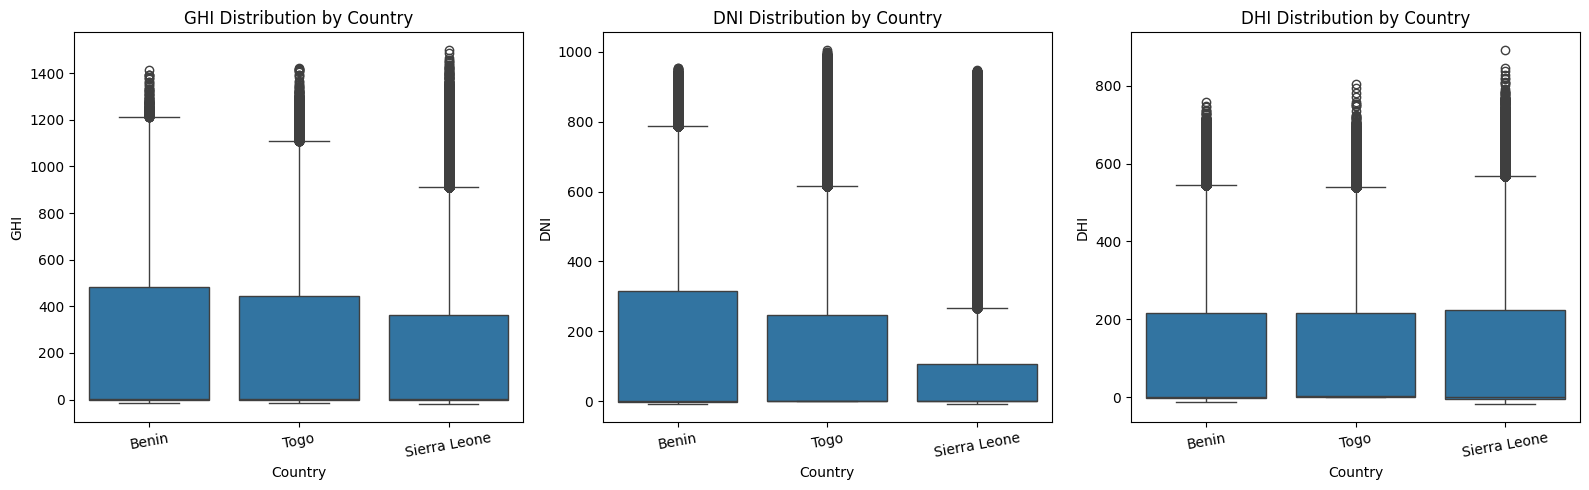

In [7]:
plt.figure(figsize=(16, 5))
for i, col in enumerate(["GHI", "DNI", "DHI"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_all, x="Country", y=col)
    plt.title(f"{col} Distribution by Country")
    plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


In [8]:
summary = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [9]:
f_ghi = f_oneway(
    benin["GHI"].dropna(),
    togo["GHI"].dropna(),
    sierra["GHI"].dropna()
)

print(f"ANOVA p-value for GHI: {f_ghi.pvalue:.5f}")


ANOVA p-value for GHI: 0.00000


## 📊 Solar Radiation Comparison Across Countries

📌 **Benin** shows the **highest average GHI (240.6 W/m²)**, followed by **Togo (230.6 W/m²)** and **Sierra Leone (202.0 W/m²)**.

📈 **Benin** also has the **highest variability** in solar radiation with a standard deviation of **331.1**, suggesting more fluctuation in solar energy availability compared to Togo (322.5) and Sierra Leone (298.5).

🧪 A **one-way ANOVA test** for GHI yielded a **p-value of 0.00000**, confirming that the differences in GHI between countries are **statistically significant** at the 95% confidence level.

➡️ These findings support prioritizing **Benin and Togo** for solar infrastructure investment due to higher and more stable irradiance levels.
